[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Anutri03/BIA/blob/main/Deep_lrn/churn_ANN_modeel.ipynb)


In [ ]:
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")


print(tf.__version__)

print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))




2.18.0
Num GPUs Available: 1


In [ ]:
# import some basic lib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# divide the dataset into dependent and independent variables

X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [ ]:
### feature engineering

geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)


In [ ]:
## concatenate the variables with dataframe

X = X.drop(['Geography','Gender'],axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X = pd.concat([X,geography,gender],axis = 1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [ ]:
# splitting iinto train test
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [ ]:
#feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [ ]:
X_train.shape

(8000, 11)

### now create ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout


In [ ]:
## initialize the ANN
classifier  = Sequential()


In [ ]:
### Adding the imput layer
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
## first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))

In [ ]:
## second HL
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.4))

In [ ]:
## adding the output layer
classifier.add(Dense(1 ,activation = 'sigmoid')) # 1 = neurons


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.01)

In [ ]:
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy']) # in otimizer we can use opt also

In [ ]:
## Early stopping

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10 ,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7891 - loss: 0.5419 - val_accuracy: 0.7910 - val_loss: 0.4470
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7931 - loss: 0.4459 - val_accuracy: 0.7910 - val_loss: 0.4377
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8074 - loss: 0.4175 - val_accuracy: 0.7910 - val_loss: 0.4226
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7960 - loss: 0.4410 - val_accuracy: 0.7910 - val_loss: 0.4162
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7981 - loss: 0.4307 - val_accuracy: 0.7910 - val_loss: 0.4113
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7927 - loss: 0.4314 - val_accuracy: 0.7910 - val_loss: 0.4047
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7902 - loss: 0.4300 - val_accuracy: 0.7910 - val_loss: 0.4090
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8045 - loss: 0.4219 -

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

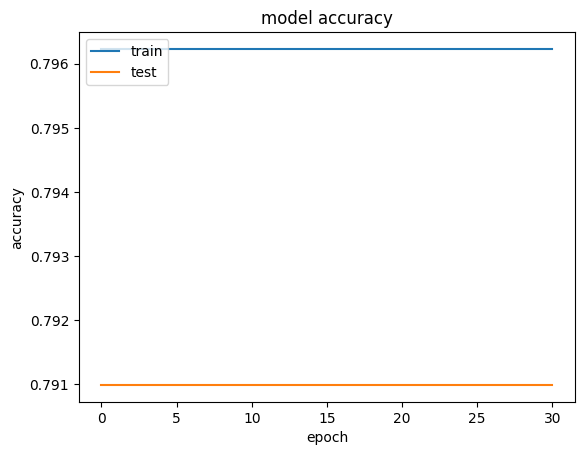

In [ ]:
# summarize the history of the accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

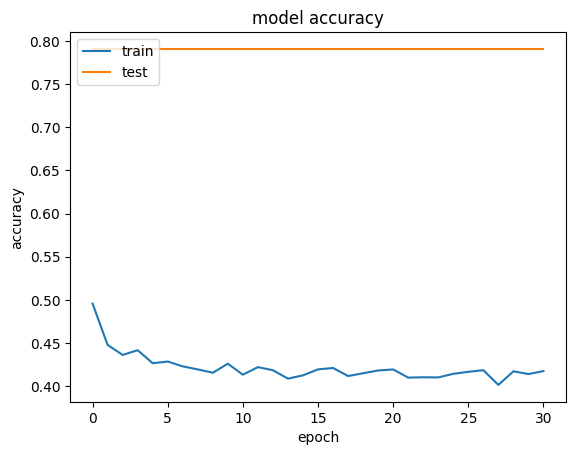

In [ ]:
# summarize the history of loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
# making prediction and evaluation the model

# predicting the test set results

y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [ ]:
## make confusion metrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)


In [ ]:
cm

array([[1607,    0],
       [ 393,    0]])

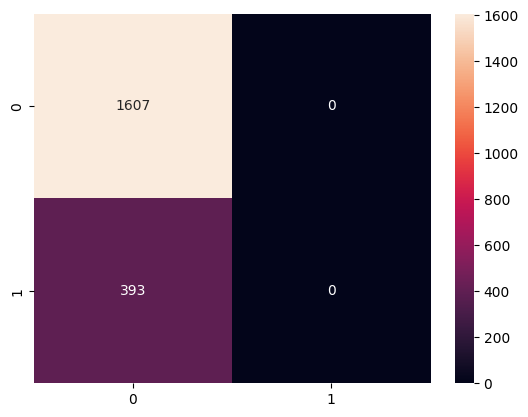

In [ ]:
import seaborn as sns
sns.heatmap(cm , annot = True,fmt='d' )
plt.show()


In [ ]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

0.8035

In [ ]:
# get weight
classifier.get_weights()

[array([[-4.4000769e-01, -2.3569572e+00, -8.7336427e-01,  4.2822105e-01,
         -5.4916912e-01, -6.0827762e-01,  1.8101838e+00, -5.7402585e-02,
         -1.7498292e-01, -1.4106981e-01,  2.2802101e-02],
        [ 1.3138126e+00, -4.1905287e-01,  2.9502099e+00,  2.5194018e+00,
          7.8752059e-01,  3.6239276e+00, -1.1283711e+00,  6.4856488e-01,
         -1.1557010e+00,  5.2108234e-01,  1.5453823e+00],
        [-1.6654219e-01,  3.2631534e-01, -6.1730194e-01, -5.8455718e-01,
         -7.2887105e-01, -8.0703698e-02,  2.4044093e-01,  7.7239817e-01,
         -1.5057448e-01, -1.9655563e-02,  1.3963030e-01],
        [ 7.8518265e-01,  3.1199777e-01,  1.6130836e+00,  1.3314662e+00,
          3.3809969e+00, -1.9481345e+00, -3.7051955e-01,  1.2713242e+00,
          7.2765636e-01,  3.5460538e-01,  6.5109736e-01],
        [ 1.5336747e+00,  4.1682935e-01,  1.8894954e+00,  8.9447695e-01,
          3.6777232e+00, -4.0648556e+00,  1.3341092e+00, -2.8354933e+00,
          1.6087860e+00,  3.6942260e+0